# Prediction of ***Bank Fraud-Transactions*** (NeurIPS 2022) ~

### Importing 'MAGIC' Commands *(`Sckit-Learn Python Library` via Supervised Machine Learning)*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import *
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
#from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Set Matplotlib to display plots inline in the Notebook
%matplotlib inline

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Increase the maximum number of columns displayed in Pandas to 200
pd.set_option('display.max_columns', 200)

# Set the default style of Matplotlib plots to "ggplot"
plt.style.use('ggplot')

# 1. *Data Import*

## Step 1: Read the Data
- Read the data (bank transactions)
- Perform some basic structural cleaning to facilitate the work

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sgpjesus/bank-account-fraud-dataset-neurips-2022")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/versions/2


In [ ]:
import os

os.listdir(path)

['Variant I.csv',
 'Base.csv',
 'Variant III.csv',
 'Variant IV.csv',
 'Variant V.csv',
 'Variant II.csv']

In [ ]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(path + "/Base.csv")

In [ ]:
# Get the number of rows and columns in the DataFrame
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 1000000
Number of columns: 32


In [ ]:
# Display the first 10 rows of the DataFrame
df.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,11556.955514,7506.951276,6482.924037,705,5,CB,134,1,BE,1,1,30,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,11723.993606,7864.277144,6338.799156,28,8,CA,72,1,BC,1,1,1,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,4999.555801,4526.861667,6426.790817,6,7,CA,163,0,BE,1,1,25,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,6979.994002,4335.685346,6624.957942,2,10,CA,35,0,BC,1,0,2,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,7549.992086,6273.922110,6312.998835,14,20,CA,201,1,BD,1,1,15,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


# 2. *`Exploratory Data Analysis` of Bank Accounts Application*

## Step 2.1: `Explore` and `Clean` the Data(where applicable)
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [ ]:
# Display SUMMARY information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
# Get the number of unique values in each column of the DataFrame
df.nunique()

,0
fraud_bool,2
income,9
name_email_similarity,998861
prev_address_months_count,374
current_address_months_count,423
customer_age,9
days_since_request,989330
intended_balcon_amount,994971
payment_type,5
zip_count_4w,6306


In [ ]:
# Get a SUMMARY of statistical information for each numerical column in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [ ]:
# Get a SUMMARY of statistical information for each non-numerical column in the DataFrame
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [ ]:
#Original Data Shape
df.shape

(1000000, 32)

In [ ]:
df.isnull().sum()

,0
fraud_bool,0
income,0
name_email_similarity,0
prev_address_months_count,0
current_address_months_count,0
customer_age,0
days_since_request,0
intended_balcon_amount,0
payment_type,0
zip_count_4w,0


#### Number of Transactions by `Fraud Status`

In [ ]:
# Create a new DataFrame showing the count of unique values in the 'fraud_bool' column
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts()).reset_index()
fraud_vals.columns = ['fraud_bool', 'count']  # Rename the columns
print(fraud_vals)

   fraud_bool   count
0           0  988971
1           1   11029


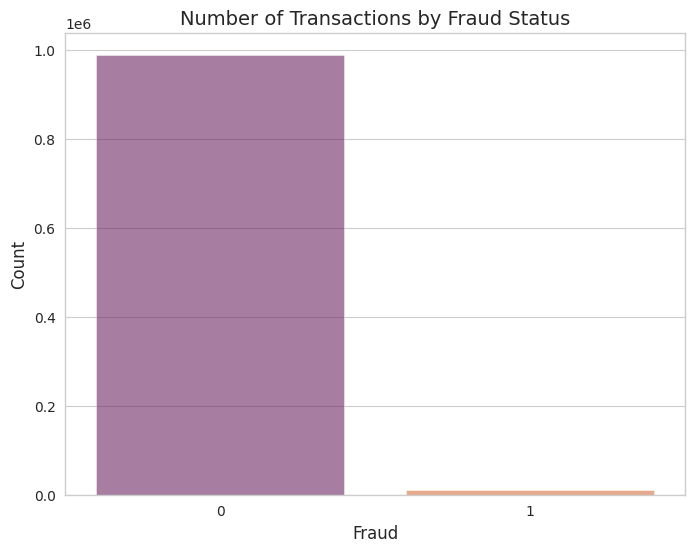

In [ ]:
# Define custom color palette
my_palette = sns.color_palette("inferno", 2)
sns.set_style("whitegrid")

# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data= fraud_vals, x= "fraud_bool", y= "count", palette= my_palette, alpha= .6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()

***The graph of the binary target feature reveals a `highly imbalanced distribution`, characterised by an extremely low prevalence of the `positive class`.***

## Step 2.2: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineering** (if useful or necessary)

#### Missing Values of Features by `Fraud Status` (Crucial)

In [ ]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count',
                    'session_length_in_minutes', 'device_distinct_emails_8w']

# For each feature, replace -1 values with NaN, calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

display(missing_vals)

,prev_address_months_count,current_address_months_count,intended_balcon_amount,bank_months_count,session_length_in_minutes,device_distinct_emails_8w
fraud_bool,,,,,,
0,71.06,0.43,74.09,25.23,0.20,0.04
1,91.89,0.13,88.38,37.54,0.16,0.04


In [ ]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

display(missing_vals)

,feature,fraud_bool,missing_vals
0,prev_address_months_count,0,71.06
1,prev_address_months_count,1,91.89
2,current_address_months_count,0,0.43
3,current_address_months_count,1,0.13
4,intended_balcon_amount,0,74.09
5,intended_balcon_amount,1,88.38
6,bank_months_count,0,25.23
7,bank_months_count,1,37.54
8,session_length_in_minutes,0,0.20
9,session_length_in_minutes,1,0.16


<Figure size 800x600 with 0 Axes>

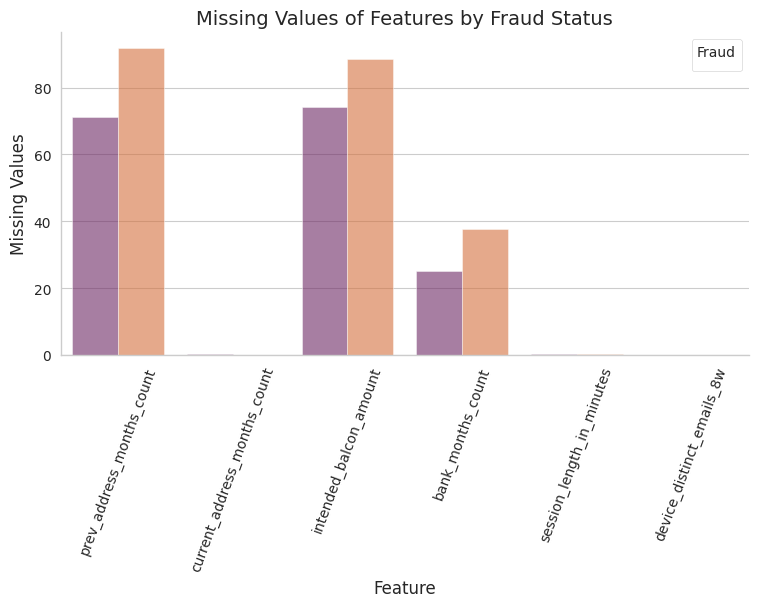

In [ ]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data= missing_vals, kind= "bar", x= "feature", y= "missing_vals", hue= "fraud_bool", palette= my_palette, alpha= .6,
            height= 4, aspect= 2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize= 12)
plt.ylabel("Missing Values", fontsize= 12)
plt.xticks(rotation= 70, fontsize= 10)
plt.yticks(fontsize= 10)
plt.title("Missing Values of Features by Fraud Status", fontsize= 14)
plt.legend(title= "Fraud", fontsize= 10)

# Display plot
plt.show()

***When examining `features` like `prev_address_months_count`, `intended_balcon_amount`, and `bank_months_count`, it becomes apparent that a considerable number of `missing values(null)` exist in their original distribution. However, despite these missing values, these features still hold informative value and exhibit correlation with the target feature.***

***It's important to highlight that the missing values in these features are actually represented by `negative values` and were not transformed into `explicit missing values` during preprocessing. The potential impact of such a transformation has not been evaluated, as it could `potentially result in information loss`, even though negative values themselves do not `possess any specific meaning`.***

### Distribution and Outliers of Features by `Fraud Status`

In [ ]:
# Create a list of numeric features in the DataFrame `df`
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]
categorical_features = df.columns[~df.columns.isin(numeric_features)].tolist()
categorical_features.remove("fraud_bool")

print(numeric_features)
print(categorical_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']
['income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


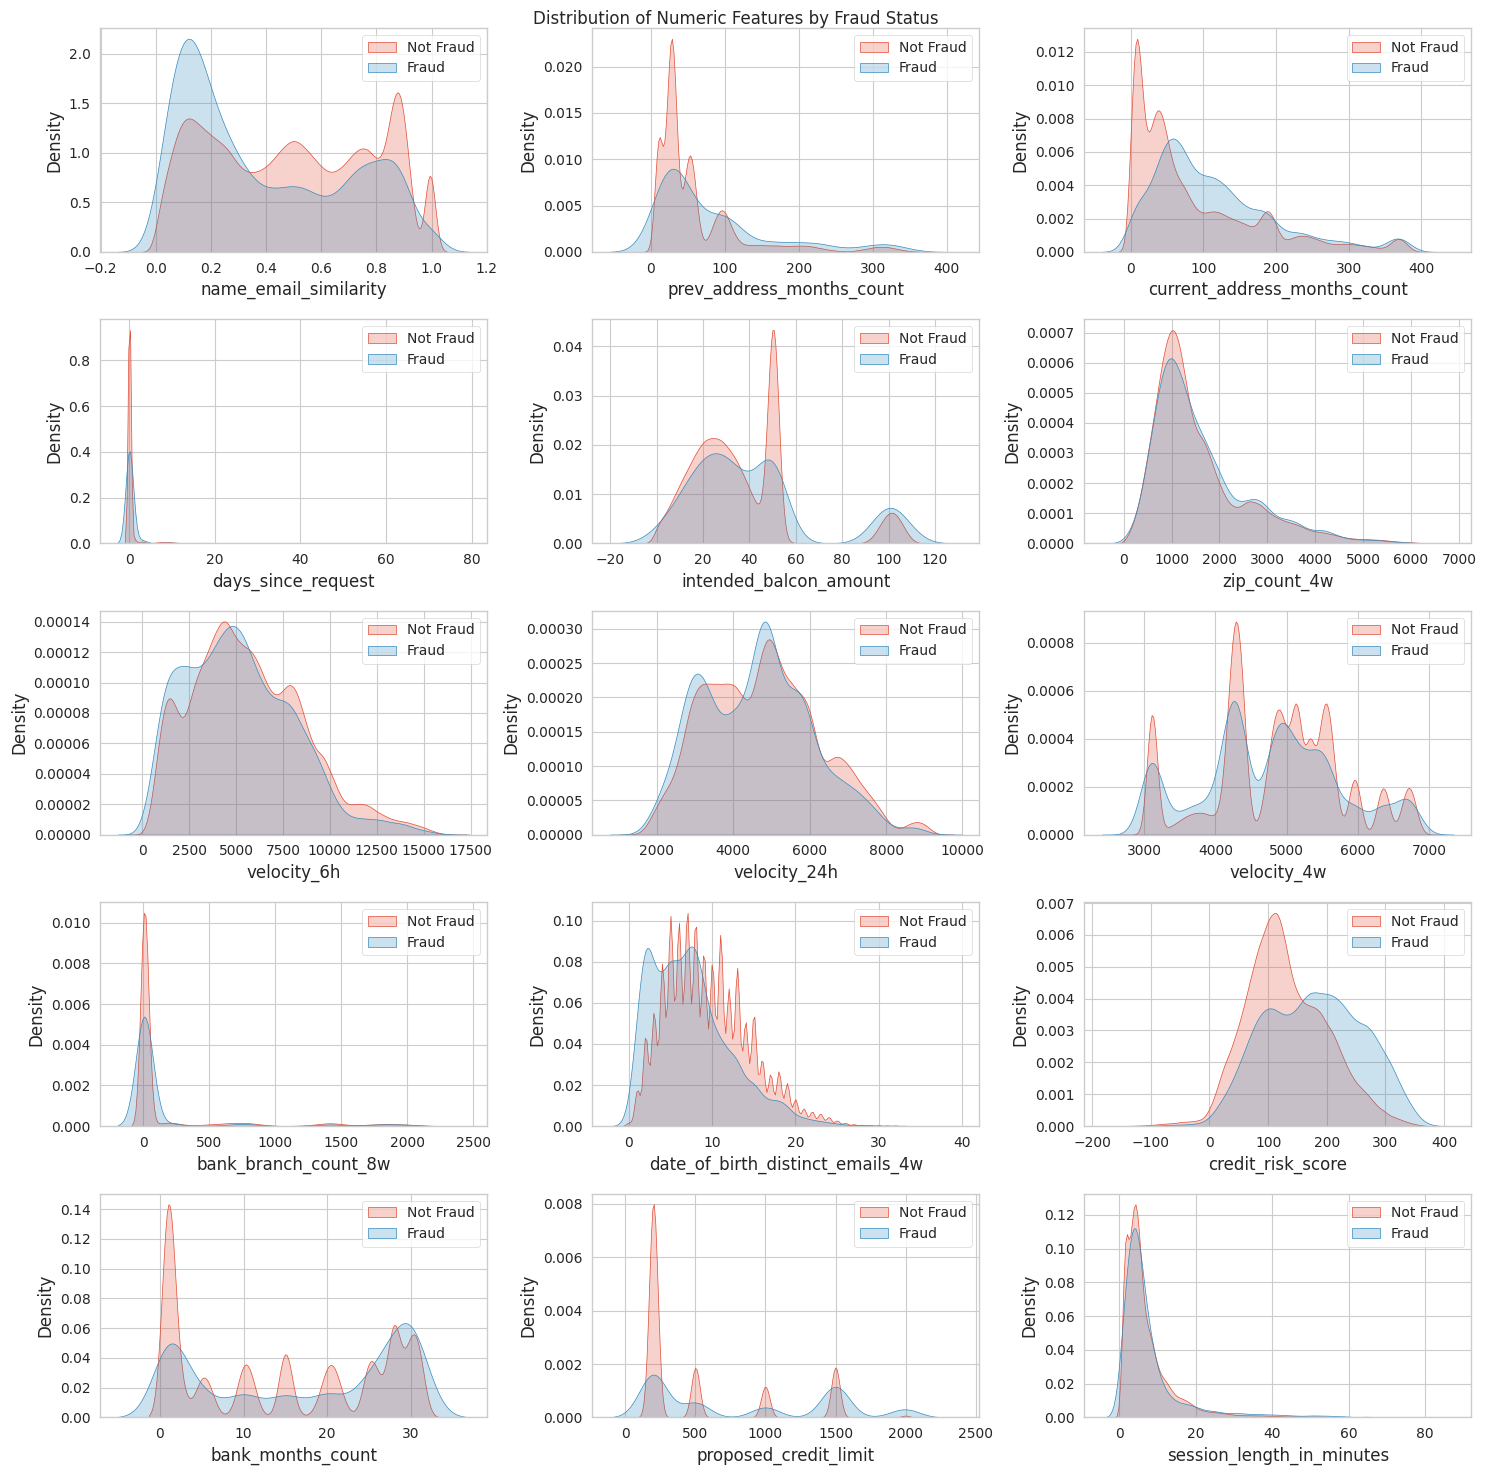

In [ ]:
# Create a grid of SUBPLOTS
fig, axes = plt.subplots(nrows= 5, ncols= 3, figsize= (15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data = df[df['fraud_bool'] == 0][feature], fill= True, ax= ax, label= 'Not Fraud')
    sns.kdeplot(data = df[df['fraud_bool'] == 1][feature], fill= True, ax= ax, label= 'Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

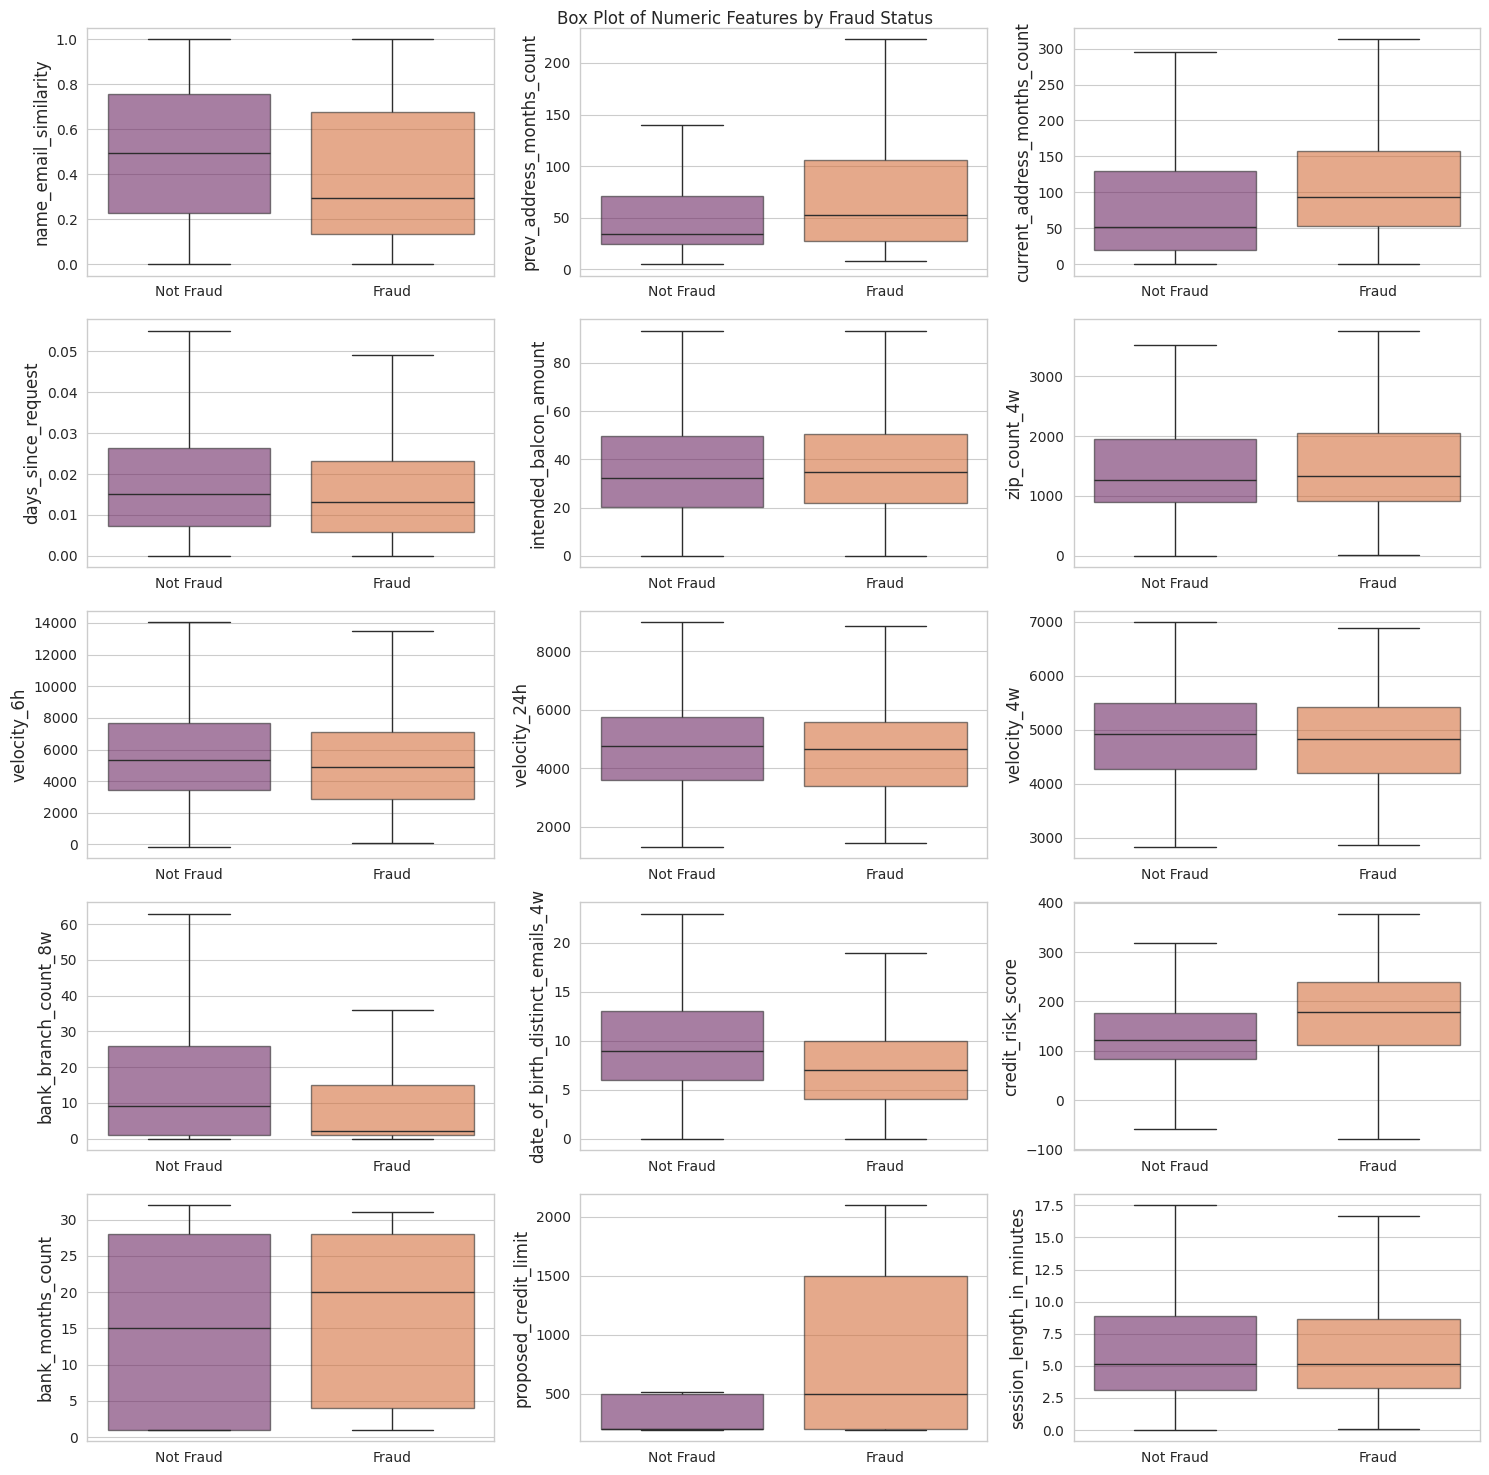

In [ ]:
# Create a grid of SUBPLOTS
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data = df, x= 'fraud_bool', y= feature, ax= ax, palette= my_palette, boxprops= dict(alpha=.6), showfliers=False)
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

***Removing outliers in the context of imbalanced data can pose challenges. Outliers may contain valuable information or represent rare instances of the minority class. Their removal can lead to information loss, distort the class distribution, introduce bias towards the majority class, and deviate from real-world scenarios.***

***Considering the potential impact on model performance, it is important to exercise caution and explore alternative approaches that preserve the integrity of the imbalanced data while addressing outliers, such as robust modeling techniques or outlier detection methods specifically designed for imbalanced datasets.***

### Feature Engineering: `Fraud Detection` of Bank Account Applications

In [ ]:
# Create a deep copy of the DataFrame
new_df = df.copy()

In [ ]:
# Display the first 5 rows of the NEW DataFrame
new_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,NaN,25.0,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9.0,0,1500.0,0,INTERNET,16.224843,linux,1,1.0,0,0
1,0,0.8,0.617426,NaN,89.0,20,0.010095,NaN,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2.0,0,1500.0,0,INTERNET,3.363854,other,1,1.0,0,0
2,0,0.8,0.996707,9.0,14.0,40,0.012316,NaN,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30.0,0,200.0,0,INTERNET,22.730559,windows,0,1.0,0,0
3,0,0.6,0.475100,11.0,14.0,30,0.006991,NaN,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1.0,0,200.0,0,INTERNET,15.215816,linux,1,1.0,0,0
4,0,0.9,0.842307,NaN,29.0,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26.0,0,200.0,0,INTERNET,3.743048,other,0,1.0,0,0


In [ ]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1)
y = new_df['fraud_bool']

# 3. Train-Test Split

## Step 3.1: **Split the Data**

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [ ]:
# Step 3: Split the original dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

# 4. Data **Transformation**

## `COMPARISON OF ENCODERS`

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values

# Load the dataset (assuming `df` is the loaded dataset)
# Replace 'Base.csv' with the actual dataset path if needed
#df = pd.read_csv("Base.csv")

# Identify categorical and numerical columns
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]
categorical_features = df.columns[~df.columns.isin(numeric_features)].tolist()
categorical_features.remove("fraud_bool")

# Split data into features and target
X = df.drop(columns=['fraud_bool'])  # Replace 'fraud_bool' with the actual target column name
y = df['fraud_bool']

# Split data into training and testing sets (Pre-Run)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ordinal Encoding Pipeline
ordinal_encoder = OrdinalEncoder()
ordinal_pipeline = Pipeline([
    ('ordinal_encoding', ColumnTransformer(
        transformers=[
            ('ordinal', ordinal_encoder, categorical_features)],
        remainder='passthrough')),
    ('model', RandomForestClassifier(random_state=42))
])

# One-Hot Encoding Pipeline with HistGradientBoostingClassifier
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) #sparse=False for compatibility
one_hot_pipeline = Pipeline([
    ('one_hot_encoding', ColumnTransformer(
        transformers=[
            ('one_hot', one_hot_encoder, categorical_features)],
        remainder='passthrough')),
    ('model', HistGradientBoostingClassifier(random_state=42))  # Use HistGradientBoostingClassifier
])

# Evaluate Ordinal Encoding
ordinal_pipeline.fit(X_train, y_train)
ordinal_preds = ordinal_pipeline.predict(X_test)
ordinal_accuracy = accuracy_score(y_test, ordinal_preds)
ordinal_roc_auc = roc_auc_score(y_test, ordinal_pipeline.predict_proba(X_test)[:, 1])

# Evaluate One-Hot Encoding
one_hot_pipeline.fit(X_train, y_train)
one_hot_preds = one_hot_pipeline.predict(X_test)
one_hot_accuracy = accuracy_score(y_test, one_hot_preds)
one_hot_roc_auc = roc_auc_score(y_test, one_hot_pipeline.predict_proba(X_test)[:, 1])

# Print results
print(f"Accuracy with Ordinal Encoding: {ordinal_accuracy:.4f}")
print(f"ROC-AUC with Ordinal Encoding: {ordinal_roc_auc:.4f}")
print(f"Accuracy with One-Hot Encoding: {one_hot_accuracy:.4f}")
print(f"ROC-AUC with One-Hot Encoding: {one_hot_roc_auc:.4f}")

# Compare and choose the better encoding method
if ordinal_accuracy > one_hot_accuracy:
    print("Ordinal Encoding achieves higher accuracy.")
else:
    print("One-Hot Encoding achieves higher accuracy.")

if ordinal_roc_auc > one_hot_roc_auc:
    print("Ordinal Encoding achieves higher ROC-AUC.")
else:
    print("One-Hot Encoding achieves higher ROC-AUC.")

Accuracy with Ordinal Encoding: 0.9895
ROC-AUC with Ordinal Encoding: 0.8299
Accuracy with One-Hot Encoding: 0.9892
ROC-AUC with One-Hot Encoding: 0.8924
Ordinal Encoding achieves higher accuracy.
One-Hot Encoding achieves higher ROC-AUC.


**Analysis:**
Accuracy measures the overall percentage of correct predictions, but it may not provide the full picture, especially in `imbalanced datasets like fraud detection.`
ROC-AUC evaluates the model's ability to distinguish between classes across different thresholds. It is particularly important for fraud detection, where reducing false negatives (failing to detect fraud) is crucial.
In this case:

`Ordinal Encoding` provides a marginally higher accuracy.
`One-Hot Encoding` achieves a much better ROC-AUC, indicating it is better at distinguishing between fraudulent and non-fraudulent transactions.

**Recommendation:**
`One-Hot Encoding` is the `preferred method` because:

The `higher ROC-AUC` shows it performs better at `identifying fraud cases,` which is critical in `this domain.`
The slight drop in accuracy (0.0003 difference) is `negligible` compared to the gain in class separation (ROC-AUC improvement of ~0.06).

***`One-hot encoding` categorical features is a valuable technique that transforms them into a format suitable for machine learning. It represents each category as a binary variable, capturing their distinctness and independence. By utilising `one-hot encoding,` the algorithm can effectively incorporate categorical information during model training. This enables better prediction and accurate decision-making based on the categorical feature values.***

## Step 4.1: **Min-Max Scaling** for `Numerical Features`

In [ ]:
# Import the necessary libraries for data preprocessing
#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import OneHotEncoder (Considered)

# Scale the numeric features in the training and testing sets using MinMaxScaler
numeric_transformer = MinMaxScaler()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", numeric_transformer),
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder()),
])

# Define the ColumnTransformer object with the numeric transformer and the list of numeric features
preprocessor = ColumnTransformer([("numeric", num_pipeline, numeric_features),
                                  ("categorical", cat_pipeline, categorical_features)
                                  ])

# Fit the preprocessor on the training set and transform both the training and testing sets
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [ ]:
# Get the names of the features after pre-processing
feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
feature_names = [feature.replace('numeric__', '') for feature in feature_names]
feature_names = [feature.replace('categorical__', 'cat__') for feature in feature_names]

# Print the pre-processed feature names
print(feature_names)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'cat__income_0.1', 'cat__income_0.2', 'cat__income_0.3', 'cat__income_0.4', 'cat__income_0.5', 'cat__income_0.6000000000000001', 'cat__income_0.7000000000000001', 'cat__income_0.8', 'cat__income_0.9', 'cat__customer_age_10', 'cat__customer_age_20', 'cat__customer_age_30', 'cat__customer_age_40', 'cat__customer_age_50', 'cat__customer_age_60', 'cat__customer_age_70', 'cat__customer_age_80', 'cat__customer_age_90', 'cat__payment_type_AA', 'cat__payment_type_AB', 'cat__payment_type_AC', 'cat__payment_type_AD', 'cat__payment_type_AE', 'cat__employment_status_CA', 'cat__employment_status_CB', 'cat__employment_status_CC', 'cat__employment_status

In [ ]:
# Convert the scaled training and testing sets to pandas DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns= feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= feature_names)

In [ ]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 83 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   name_email_similarity               800000 non-null  float64
 1   prev_address_months_count           800000 non-null  float64
 2   current_address_months_count        800000 non-null  float64
 3   days_since_request                  800000 non-null  float64
 4   intended_balcon_amount              800000 non-null  float64
 5   zip_count_4w                        800000 non-null  float64
 6   velocity_6h                         800000 non-null  float64
 7   velocity_24h                        800000 non-null  float64
 8   velocity_4w                         800000 non-null  float64
 9   bank_branch_count_8w                800000 non-null  float64
 10  date_of_birth_distinct_emails_4w    800000 non-null  float64
 11  credit_risk_score         

***MinMax scaling is employed to normalise numerical features within a specific range, usually 0 to 1. This technique standardises the features, ensuring equitable evaluation during training. By applying MinMax scaling, the numerical features become comparable, resulting in more dependable and precise outcomes from the machine learning algorithm.***

## Step 4.2: **Pearson Correlation** Test for `Multicollinearity`

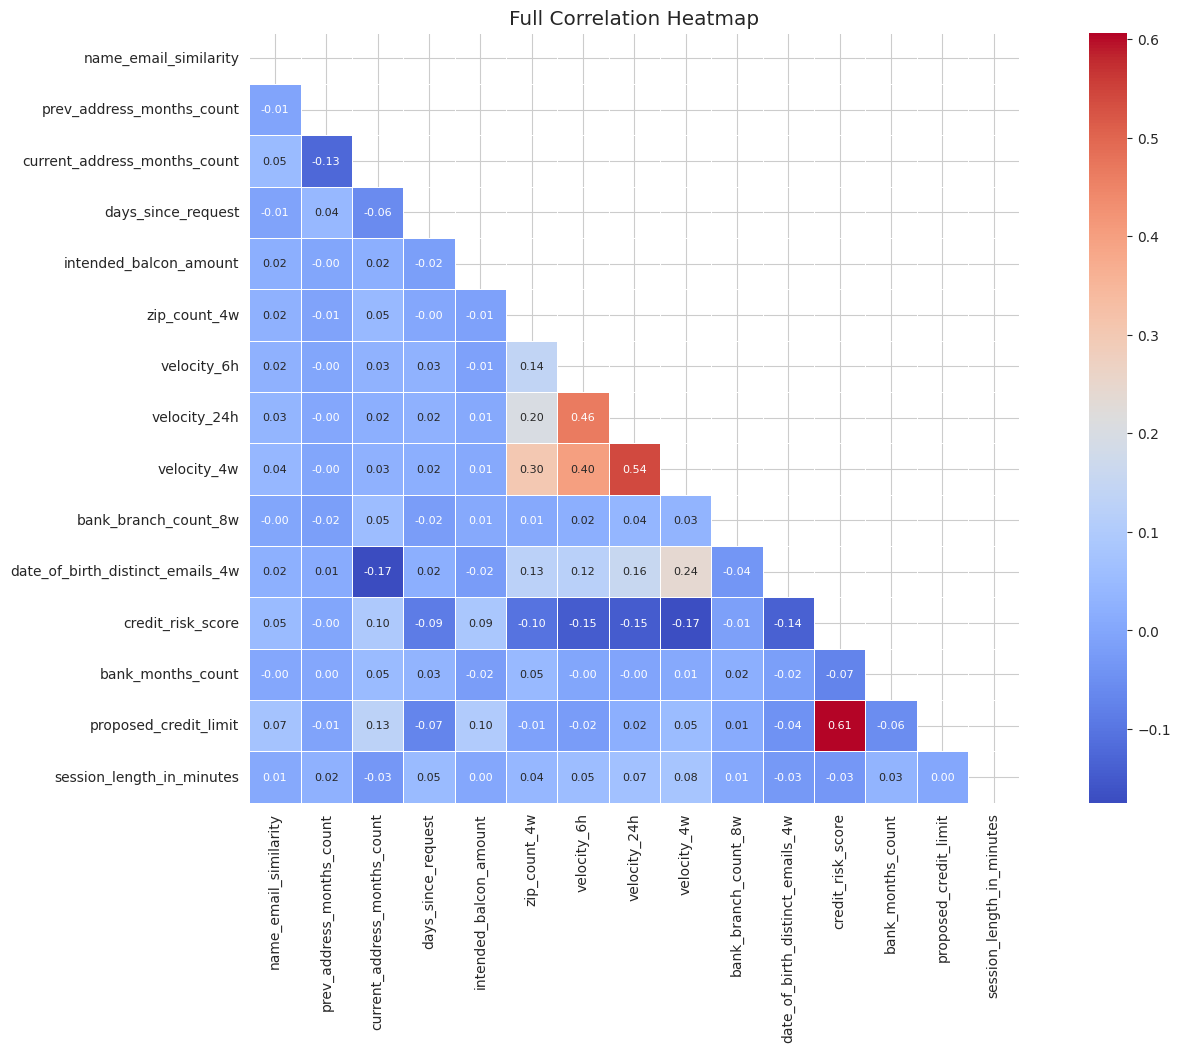

In [ ]:
# Compute correlation matrix
X_train_corr = X_train_scaled[numeric_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(X_train_corr, dtype=bool))

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask,
            linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Full Correlation Heatmap')
plt.show()

Since we are interested in the **feature variables** that are **correlated** with each other, we display those correlation readings with absolute values **above 0.4**

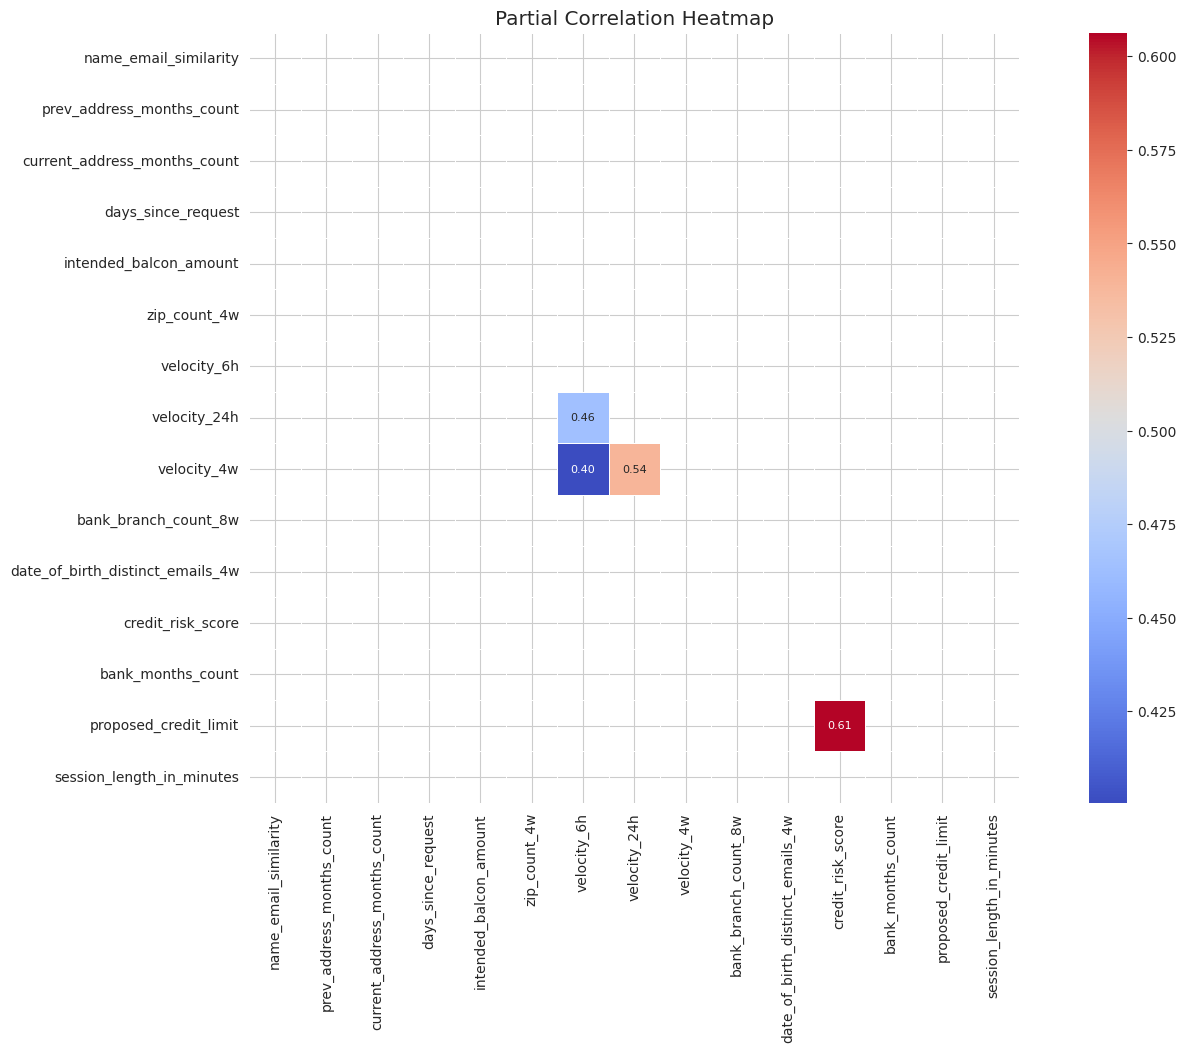

In [ ]:
# Compute correlation matrix
X_train_corr = X_train_scaled[numeric_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(X_train_corr[(X_train_corr >= 0.4) | (X_train_corr <= -0.4)], mask=mask,
            annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Partial Correlation Heatmap')
plt.show()

***To assess multicollinearity within the dataset, Pearson correlation coefficient was employed as a measure of linear relationship between features. This statistical analysis helped identify potential correlations between variables. Fortunately, no features displayed a correlation exceeding `0.67` indicating a lack of strong linear dependencies.***

## Step 4.3: Label Encoding

In [ ]:
y.value_counts(normalize= True) *100

,proportion
fraud_bool,
0,98.8971
1,1.1029


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X_train_scaled.select_dtypes(include=['object']):
    X_train_scaled.loc[:, col] = le.fit_transform(X.loc[:, col])

for col in X_test_scaled.select_dtypes(include=['object']):
    X_test_scaled.loc[:, col] = le.fit_transform(X.loc[:, col])

y = le.fit_transform(y)

In [ ]:
X_train_scaled.shape

(800000, 83)

## Step 4.4: **Resampling** of `Imbalanced` Dataset

**`SMOTE Helper:`**
https://www.kaggle.com/code/turkayavci/fraud-detection-on-bank-payments/notebook

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print('Original dataset shape %s' % Counter(y_train))

y_train_res = pd.DataFrame(y_train_res)
# print('Resampled dataset shape %s' % Counter(y_train_res))
print(y_train_res.value_counts())

Original dataset shape Counter({0: 791080, 1: 8920})
fraud_bool
0             791080
1             791080
Name: count, dtype: int64


# 5. **Modelling** ~

## Step 5.1: `Define` each of a **Model**

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators= 100 , class_weight= 'balanced')
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(class_weight= 'balanced')
lgb_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

## Step 5.2: `Fit` each of a **Model**

In [ ]:
rf_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced')

In [ ]:
lgb_clf.fit(X_train_res, y_train_res)

[LightGBM] [Info] Number of positive: 791080, number of negative: 791080
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.769662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19719
[LightGBM] [Info] Number of data points in the train set: 1582160, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced')

# 6. **Evaluation** ~

## Step 6A: `Verify and Evaluate` the **Training Models**
- Use the **training** data to make predictions
- What `metrics` are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

### 6A1. **Random Forest**

In [ ]:
y_pred = rf_clf.predict(X_train_res)
confusion_matrix(y_train_res, y_pred)

array([[791080,      0],
       [     1, 791079]])

In [ ]:
rf_clf.score(X_train_res, y_train_res)

0.9999993679526723

In [ ]:
print(metrics.classification_report(y_train_res, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    791080
           1       1.00      1.00      1.00    791080

    accuracy                           1.00   1582160
   macro avg       1.00      1.00      1.00   1582160
weighted avg       1.00      1.00      1.00   1582160



In [ ]:
roc_auc_score(y_train_res, rf_clf.predict_proba(X_train_res)[:, 1])

1.0

### 6A2. **LightGBM**

In [ ]:
y_pred = lgb_clf.predict(X_train_res)
confusion_matrix(y_train_res, y_pred)

array([[788701,   2379],
       [ 11374, 779706]])

In [ ]:
lgb_clf.score(X_train_res, y_train_res)

0.9913074531020882

In [ ]:
print(metrics.classification_report(y_train_res, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    791080
           1       1.00      0.99      0.99    791080

    accuracy                           0.99   1582160
   macro avg       0.99      0.99      0.99   1582160
weighted avg       0.99      0.99      0.99   1582160



In [ ]:
roc_auc_score(y_train_res, lgb_clf.predict_proba(X_train_res)[:, 1])

0.998579484458595

## Step 6B: `Make Predictions` and `Evaluate` the **Test Models**
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

### 6B1. **Random Forest**

In [ ]:
y_pred = rf_clf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[197095,    796],
       [  1921,    188]])

In [ ]:
rf_clf.score(X_test_scaled, y_test)

0.986415

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197891
           1       0.19      0.09      0.12      2109

    accuracy                           0.99    200000
   macro avg       0.59      0.54      0.56    200000
weighted avg       0.98      0.99      0.98    200000



In [ ]:
roc_auc_score(y_test, rf_clf.predict_proba(X_test_scaled)[:, 1])

0.8482447168310652

In [ ]:
# Thresholding (Considered)
'''threshold = 0.30

# imbalanced dataset with threshold setting
y_pred = rf_clf.predict_proba(X_test_scaled)[:, 1] > threshold
y_pred = y_pred.astype(int)

print(metrics.classification_report(y_test, y_pred))'''


#Default threshold coding:
#y_pred = lgb.predict(X_test_scaled)

#print(metrics.classification_report(y_test, y_pred))

'threshold = 0.30\n\n# imbalanced dataset with threshold setting\ny_pred = rf_clf.predict_proba(X_test_scaled)[:, 1] > threshold\ny_pred = y_pred.astype(int)\n\nprint(metrics.classification_report(y_test, y_pred))'

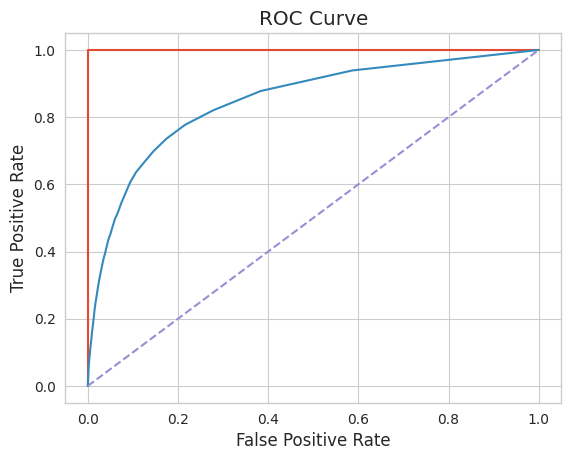

In [ ]:
#fpr = False Positive Rate
#tpr = True Positive Rate

fpr1, tpr1, _ = roc_curve(y_train, rf_clf.predict_proba(X_train_scaled)[:,1])
fpr2, tpr2, _ = roc_curve(y_test, rf_clf.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### 6B2. **LightGBM**

In [ ]:
y_pred = lgb_clf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[197290,    601],
       [  1905,    204]])

In [ ]:
lgb_clf.score(X_test_scaled, y_test)

0.98747

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197891
           1       0.25      0.10      0.14      2109

    accuracy                           0.99    200000
   macro avg       0.62      0.55      0.57    200000
weighted avg       0.98      0.99      0.98    200000



In [ ]:
roc_auc_score(y_test, lgb_clf.predict_proba(X_test_scaled)[:, 1])

0.8738768929073056

In [ ]:
# Thresholding (Considered)
'''threshold = 0.30

# imbalanced dataset with threshold setting
y_pred = lgb_clf.predict_proba(X_test_scaled)[:, 1] > threshold
y_pred = y_pred.astype(int)

print(metrics.classification_report(y_test, y_pred))'''


#Default threshold coding:
#y_pred = lgb.predict(X_test_scaled)
#print(metrics.classification_report(y_test, y_pred))

'threshold = 0.30\n\n# imbalanced dataset with threshold setting\ny_pred = lgb_clf.predict_proba(X_test_scaled)[:, 1] > threshold\ny_pred = y_pred.astype(int)\n\nprint(metrics.classification_report(y_test, y_pred))'

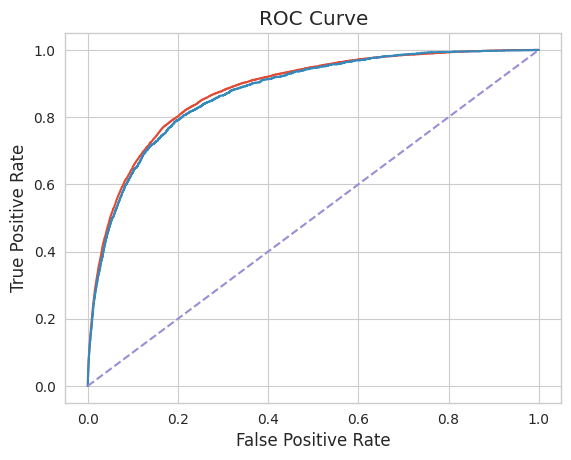

In [ ]:
#fpr = False Positive Rate
#tpr = True Positive Rate

fpr1, tpr1, _ = roc_curve(y_train, lgb_clf.predict_proba(X_train_scaled)[:,1])
fpr2, tpr2, _ = roc_curve(y_test, lgb_clf.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 7. Business Recommendation

## Step 7.1: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

### The **performance metrics** as follow are base on `Macro Average`:

| Test Models               | ROC-AUC | Precision | Recall | F1-Score | Accuracy |
|:-------------------------:|:-------:|:---------:|:------:|:--------:|:--------:|
| Random Forest             | **`0.8482`**  | 0.59      | 0.54   | 0.56     | 0.986     |
| LightGBM                  | `0.8738`      | 0.62      | 0.55   | 0.57     | 0.987     |

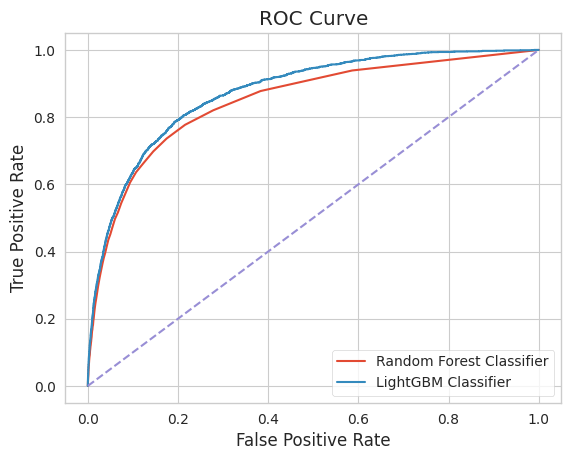

In [ ]:
#fpr = False Positive Rate
#tpr = True Positive Rate

fpr1, tpr1, _ = roc_curve(y_test, rf_clf.predict_proba(X_test_scaled)[:,1])
fpr2, tpr2, _ = roc_curve(y_test, lgb_clf.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr1, tpr1, label= 'Random Forest Classifier')
plt.plot(fpr2, tpr2, label= 'LightGBM Classifier')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()

### **In Conclusion:** I would recommend using *`LightGBM Classifier Model`* ~  


## Step 7.2: `Business Recommendation`

**Adopt LightGBM:**
Use LightGBM as the core model due to its superior performance in distinguishing fraudulent transactions (ROC-AUC: 0.8738).

**Optimize Decision Thresholds:**
Adjust thresholds to balance precision and recall based on the bank’s priorities (e.g., higher recall for fraud prevention).